In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 

import numpy as np
import pandas as pd

In [8]:
df_train = pd.read_csv('../final_split_data/train.csv')
df_test = pd.read_csv('../final_split_data/test.csv')
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1:]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1:]

In [9]:
df_train.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,4Dm32oO01YpIubCHaAtKkN,https://p.scdn.co/mp3-preview/d497b49b34a981de...,1,0.510451,0.884351,0.926935,0.066300,0.001404,0.000000,0.204319,...,0,1,0,0,0,2,0,0,0,4
1,48KXAIruJ07kJVCWOGohMV,https://p.scdn.co/mp3-preview/8823580e4eb9a076...,0,0.561056,0.519303,0.840907,0.451891,0.538152,0.000000,0.134551,...,0,0,0,0,0,0,0,0,0,5
2,5KDNFlHAdDJ84fhK27c35X,https://p.scdn.co/mp3-preview/fe09f844258205cd...,0,0.334433,0.896419,0.908090,0.080421,0.000033,0.174897,0.408638,...,0,0,0,0,2,0,0,2,0,3
3,3RBGG1be9aBaSvjnw6ABkh,https://p.scdn.co/mp3-preview/aa11a5ceb81c3649...,1,0.671067,0.620873,0.902988,0.045476,0.123493,0.000000,0.566445,...,0,0,2,1,0,1,1,0,1,5
4,6IvxXL0dqXJlgIoIFfMqFA,https://p.scdn.co/mp3-preview/934f4a3cdc2093ac...,1,0.518152,0.956757,0.853730,0.065342,0.000008,0.409465,0.049834,...,0,0,0,0,6,0,0,0,0,3


In [10]:
df_test.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,3CspfYGpqAqgbRqUuxmW0r,https://p.scdn.co/mp3-preview/2f17b7699c073731...,0,0.433443,0.867255,0.910181,0.084490,0.006113,0.00056,0.358804,...,0,0,0,0,0,0,0,0,0,3
1,2xyx0o4xNOLLjBSbOOdcbA,https://p.scdn.co/mp3-preview/46e4c4a09308f36d...,0,0.730473,0.407677,0.854455,0.091431,0.605421,0.00000,0.338870,...,0,0,1,1,0,0,1,0,0,5
2,0EIsxWGPSte4cAHZw5aXr4,https://p.scdn.co/mp3-preview/b265db91a5f0b7ce...,0,0.365237,0.745573,0.886262,0.605074,0.001755,0.00000,0.476744,...,0,0,0,0,0,2,0,0,0,5
3,08SB2OtZkaliju77WYEKxk,https://p.scdn.co/mp3-preview/c5e8a0edc4650255...,0,0.709571,0.618862,0.876227,0.399234,0.170681,0.00000,0.451827,...,0,0,0,0,0,1,1,0,0,5
4,2iclfHORMqpR3TxuhwVRhD,https://p.scdn.co/mp3-preview/9f44a2b1caddc2de...,1,0.772277,0.649031,0.853535,0.437530,0.056525,0.00000,0.652824,...,0,1,4,3,0,3,3,0,0,5


In [11]:
gradient = GradientBoostingClassifier()
params = { 
            'loss': ['log_loss','exponential'],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators' : [100, 200, 400],
            'criterion' :['friedman_mse', 'squared_error'],
            'min_samples_split' :[0.01, 0.05, 0.1],
            'max_depth': [3,4,5,6,],
            'max_features': ['sqrt', 'log2']
        }
# CV_rfc = GridSearchCV(estimator=gradientGridCV, param_grid=params, cv=3)
# CV_rfc.fit(X_train.iloc[:,2:], y_train)
# CV_rfc.best_params_

#Select Features
sel = SelectFromModel(gradient)
# sel = SequentialFeatureSelector(estimator=gradient, n_features_to_select='auto',tol=0.05, direction='forward', cv=5)
X_train_selected = sel.fit_transform(X_train.iloc[:, 2:], y_train)

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print("Selected Features Length:", len(sel.get_feature_names_out()))
print("Selected Features:", ", ".join(sel.get_feature_names_out()))

# gb_random = RandomizedSearchCV(estimator = gradient, param_distributions = params, n_iter = 100, cv = 5, verbose=3, n_jobs = -1)
gb_grid = GridSearchCV(estimator = gradient, param_grid = params, cv = 5, n_jobs = -1)
# Fit the random search model
# gb_random.fit(X_train_selected, y_train)
gb_grid.fit(X_train_selected, y_train)

Selected Features Length: 19
Selected Features: danceability, energy, loudness, speechiness, acousticness, mfcc_1Mean, mfcc_3Mean, mfcc_5Std, mfcc_7Std, spect_centroid_Std, spect_contrast_Mean, artist_genre_classical, artist_genre_contemporary, artist_genre_country, artist_genre_hip, artist_genre_hop, artist_genre_metal, artist_genre_pop, artist_genre_rap


/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 400]})

In [15]:
# Best parameters based on RandomSearcCV
gb_grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 0.01,
 'n_estimators': 100}

In [16]:
gradientBooster = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05, loss='log_loss', max_depth=6, max_features='sqrt', min_samples_split=0.01, n_estimators=100)
gradientBooster.fit(X_train_selected, y_train)

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           max_depth=6, max_features='sqrt',
                           min_samples_split=0.01)

In [17]:
X_test_selected = X_test[sel.get_feature_names_out()]
predictions = gradientBooster.predict(X_test_selected)
acc = metrics.accuracy_score(predictions,y_test)
acc

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


0.8719879518072289

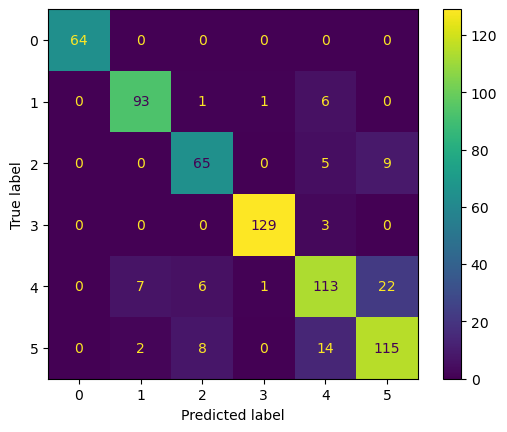

In [24]:
matrix = metrics.confusion_matrix(predictions, y_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

In [25]:
X_test_selected.head()

,danceability,energy,loudness,speechiness,acousticness,mfcc_1Mean,mfcc_3Mean,mfcc_5Std,mfcc_7Std,spect_centroid_Std,spect_contrast_Mean,artist_genre_classical,artist_genre_contemporary,artist_genre_country,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap
0,0.433443,0.867255,0.910181,0.084490,0.006113,0.882988,0.300035,0.187028,0.184643,0.200758,0.306161,0,0,0,0,0,0,0,0
1,0.730473,0.407677,0.854455,0.091431,0.605421,0.751426,0.649702,0.603859,0.791430,0.792528,0.455263,0,0,0,1,1,0,0,1
2,0.365237,0.745573,0.886262,0.605074,0.001755,0.766276,0.710536,0.566007,0.451141,0.452694,0.443859,0,1,0,0,0,0,2,0
3,0.709571,0.618862,0.876227,0.399234,0.170681,0.731102,0.538646,0.490948,0.649905,0.437806,0.587780,0,0,0,0,0,0,1,1
4,0.772277,0.649031,0.853535,0.437530,0.056525,0.728571,0.612419,0.730236,0.688823,0.583249,0.452327,0,1,0,4,3,0,3,3


In [26]:
test = pd.DataFrame(data=predictions)
test.head()

,0
0,1
1,2
2,5
3,5
4,5


In [27]:
y_test

,genre
0,3
1,5
2,5
3,5
4,5
...,...
659,3
660,5
661,5
662,0


In [28]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test)
results = pd.concat([X_test.reset_index(drop=True), actual.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)


In [29]:
results.head(50)

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre,0
0,3CspfYGpqAqgbRqUuxmW0r,https://p.scdn.co/mp3-preview/2f17b7699c073731...,0,0.433443,0.867255,0.910181,0.084490,0.006113,0.000560,0.358804,...,0,0,0,0,0,0,0,0,3,1
1,2xyx0o4xNOLLjBSbOOdcbA,https://p.scdn.co/mp3-preview/46e4c4a09308f36d...,0,0.730473,0.407677,0.854455,0.091431,0.605421,0.000000,0.338870,...,0,1,1,0,0,1,0,0,5,2
2,0EIsxWGPSte4cAHZw5aXr4,https://p.scdn.co/mp3-preview/b265db91a5f0b7ce...,0,0.365237,0.745573,0.886262,0.605074,0.001755,0.000000,0.476744,...,0,0,0,0,2,0,0,0,5,5
3,08SB2OtZkaliju77WYEKxk,https://p.scdn.co/mp3-preview/c5e8a0edc4650255...,0,0.709571,0.618862,0.876227,0.399234,0.170681,0.000000,0.451827,...,0,0,0,0,1,1,0,0,5,5
4,2iclfHORMqpR3TxuhwVRhD,https://p.scdn.co/mp3-preview/9f44a2b1caddc2de...,1,0.772277,0.649031,0.853535,0.437530,0.056525,0.000000,0.652824,...,1,4,3,0,3,3,0,0,5,5
5,4neOAoU5m6utkn78C6uLcC,https://p.scdn.co/mp3-preview/713eb29bd8d1ac73...,1,0.222222,0.021511,0.221649,0.044998,0.997992,0.865226,0.083056,...,0,0,0,0,0,0,0,0,0,0
6,3KGvzl1vguT4QLEXsplga2,https://p.scdn.co/mp3-preview/5080f14590b62e6a...,1,0.327833,0.389576,0.787411,0.025850,0.621485,0.000009,0.147841,...,0,0,0,0,0,0,0,0,5,5
7,6DCZcSspjsKoFjzjrWoCdn,https://p.scdn.co/mp3-preview/a90a7912992fdfd4...,1,0.761276,0.448908,0.781835,0.205361,0.033332,0.000085,0.882060,...,0,2,2,0,2,2,0,0,2,2
8,5Gw8owErJLfkNxWCSwPQKJ,https://p.scdn.co/mp3-preview/3b93dbd08328af4d...,0,0.462046,0.948712,0.948567,0.148396,0.002518,0.000000,0.042525,...,0,0,0,1,1,0,0,0,3,3
9,736PP5LTtREkDgktNmX3Gu,https://p.scdn.co/mp3-preview/33c4b7ce820311cd...,1,0.482948,0.444886,0.784456,0.032791,0.616465,0.038374,0.287375,...,0,0,0,0,0,0,0,0,5,5


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17a4cf4d-2885-4c39-8a41-18cbbdec5ed5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>